In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf



from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score



In [3]:
# Dataset inlezen

df = pd.read_csv('Students_Grading_Dataset.csv')

In [4]:
# Bekijk de eerste rijen

df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


In [150]:
# Zijn er ontbrekende waarden?
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [5]:
# Niet relevantie kolommen droppen

df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Parent_Education_Level', 'Family_Income_Level'], inplace=True)

# Ik gebruik hier pd.get_dummies() om categorische kolommen (zoals Gender, Department, etc.) om te zetten naar numerieke kolommen — een noodzakelijke stap voor veel machine learning-algoritmen

df = pd.get_dummies(df, columns=['Gender', 'Department', 'Extracurricular_Activities', 'Grade', 'Internet_Access_at_Home'])



df.head()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,...,Department_Mathematics,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Grade_A,Grade_B,Grade_C,Grade_D,Grade_F,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes
0,22,97.36,40.61,59.61,73.69,53.17,7.34,62.84,83.49,10.3,...,True,False,True,False,False,True,False,False,True,False
1,18,97.71,57.27,74.00,74.23,98.23,8.80,98.23,92.29,27.1,...,False,True,False,False,False,False,False,True,True,False
2,24,99.52,41.84,63.85,85.85,50.00,0.47,91.22,93.55,12.4,...,False,False,True,False,False,False,False,True,True,False
3,24,90.38,45.65,44.44,68.10,66.27,0.42,55.48,51.03,25.5,...,False,True,False,True,False,False,False,False,False,True
4,23,59.41,53.13,61.77,67.66,83.98,6.43,87.43,90.91,13.3,...,False,False,True,True,False,False,False,False,True,False


In [177]:
print(df.dtypes)

Age                                 int64
Attendance (%)                    float64
Midterm_Score                     float64
Final_Score                       float64
Assignments_Avg                   float64
Quizzes_Avg                       float64
Participation_Score               float64
Projects_Score                    float64
Total_Score                       float64
Study_Hours_per_Week              float64
Stress_Level (1-10)                 int64
Sleep_Hours_per_Night             float64
Gender_Female                        bool
Gender_Male                          bool
Department_Business                  bool
Department_CS                        bool
Department_Engineering               bool
Department_Mathematics               bool
Extracurricular_Activities_No        bool
Extracurricular_Activities_Yes       bool
Grade_A                              bool
Grade_B                              bool
Grade_C                              bool
Grade_D                           

# Decision Tree Model

In [206]:
# Stap 1: Eén Grade-kolom maken uit one-hot encoding
grade_columns = ['Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_F']
df['Grade'] = df[grade_columns].idxmax(axis=1).str.replace('Grade_', '')

# Stap 2: Features kiezen (alle kolommen behalve de oude Grade booleans en de nieuwe Grade kolom)
# 1. Kies relevante features
features = [
    'Attendance (%)',
    'Midterm_Score',
    'Assignments_Avg',
    'Quizzes_Avg',
    'Participation_Score',
    'Projects_Score',
    'Study_Hours_per_Week',
    'Sleep_Hours_per_Night',
    'Stress_Level (1-10)'
]
# Stap 3: Target
y = df['Grade']  # bevat nu: 'A', 'B', 'C', 'D', 'F'
X = df[features]

X

,Attendance (%),Midterm_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Study_Hours_per_Week
0,97.36,40.61,73.69,53.17,7.34,62.84,10.3
1,97.71,57.27,74.23,98.23,8.80,98.23,27.1
2,99.52,41.84,85.85,50.00,0.47,91.22,12.4
3,90.38,45.65,68.10,66.27,0.42,55.48,25.5
4,59.41,53.13,67.66,83.98,6.43,87.43,13.3
...,...,...,...,...,...,...,...
4995,96.09,45.86,74.13,81.53,0.98,51.66,7.8
4996,96.30,78.67,57.89,85.96,4.78,52.33,24.2
4997,89.94,50.84,84.69,82.27,0.75,97.89,7.6
4998,99.09,55.44,78.78,55.96,6.29,84.74,14.5


In [207]:
from sklearn.preprocessing import LabelEncoder

# Stap 4: Encode target labels naar getallen
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [235]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Decision tree model trainen
tree_model = DecisionTreeClassifier(max_depth=13, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=13, random_state=42)

In [236]:
# Voorspellen en evalueren
y_pred = tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.208


In [237]:
from sklearn.metrics import classification_report

y_pred = tree_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.208
              precision    recall  f1-score   support

           A       0.18      0.35      0.24       191
           B       0.28      0.12      0.17       201
           C       0.14      0.04      0.07       211
           D       0.22      0.48      0.30       197
           F       0.24      0.07      0.11       200

    accuracy                           0.21      1000
   macro avg       0.21      0.21      0.18      1000
weighted avg       0.21      0.21      0.17      1000



# Neural Network

In [153]:

# 1. Kies relevante features
features = [
    'Attendance (%)',
    #'Midterm_Score',
    #'Assignments_Avg',
    #'Quizzes_Avg',
    'Participation_Score',
    #'Projects_Score',
    #'Department_Business',
    #'Department_CS',
    #'Department_Engineering',
    #'Department_Mathematics',
     'Study_Hours_per_Week',

]
target_columns = ['Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_F']

# 2. Selecteer predictors en targets
predictors = df[features].copy()
target_variable = df[target_columns]

# 3. Normaliseer alleen numerieke kolommen (tussen 0-1)
# Selecteer alleen numerieke kolommen binnen 'predictors'
numerieke_predictors = predictors.select_dtypes(include=['int64', 'float64']).columns

# Normaliseer alleen die kolommen
predictors[numerieke_predictors] = predictors[numerieke_predictors].apply(lambda x: x / x.max())



# 4. Zet om naar float32 voor TensorFlow
X = predictors.values.astype('float32')
y = target_variable.values.astype('float32')

# 5. Train-test splitsen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print(f"X_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")

print(y_train[:1000])
print(y_train.shape)


X_train shape: (3500, 3)
x_test shape: (1500, 3)
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
(3500, 5)


In [143]:
X_test


array([[0.6156    , 0.494     , 0.47333333],
       [0.5191    , 0.373     , 0.31      ],
       [0.8227    , 0.869     , 0.19333333],
       ...,
       [0.5934    , 0.181     , 0.41666666],
       [0.6219    , 0.676     , 0.30333334],
       [0.6517    , 0.379     , 0.64666665]], dtype=float32)

In [148]:
from tensorflow.python.keras.layers import Dropout

# TensorFlow Model maken


model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1],)))  # aparte inputlaag
model.add(tf.keras.layers.Dense(3, activation= "relu"))

model.add(tf.keras.layers.Dense(33, activation= "relu"))


model.add(tf.keras.layers.Dense(5, activation= "softmax"))


In [149]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss='categorical_crossentropy',
    optimizer= optimizer,
    metrics=['accuracy']
)


In [150]:
from tensorflow.python.keras.callbacks import EarlyStopping

# Trainen
early_stop = EarlyStopping(
    monitor='val_loss',     # Kijk naar de validatie-loss
    patience=10,            # Stop als 10 epochs lang geen verbetering
    restore_best_weights=True  # Herstel het beste model
)
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evalueren
loss, acc = model.evaluate(X_test, y_test)
print(f"Nauwkeurigheid (accuracy) op testset: {acc:.4f}")


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1926 - loss: 1.6178 - val_accuracy: 0.1960 - val_loss: 1.6094
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1974 - loss: 1.6100 - val_accuracy: 0.1920 - val_loss: 1.6095
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2160 - loss: 1.6095 - val_accuracy: 0.2000 - val_loss: 1.6099
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1977 - loss: 1.6099 - val_accuracy: 0.1887 - val_loss: 1.6108
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2060 - loss: 1.6094 - val_accuracy: 0.1900 - val_loss: 1.6109
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2063 - loss: 1.6095 - val_accuracy: 0.1880 - val_loss: 1.6105
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2064 - loss: 1.6096 - val_accuracy: 0.1887 - val_loss: 1.6104
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2113 - loss: 1.6084 - val_accu

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


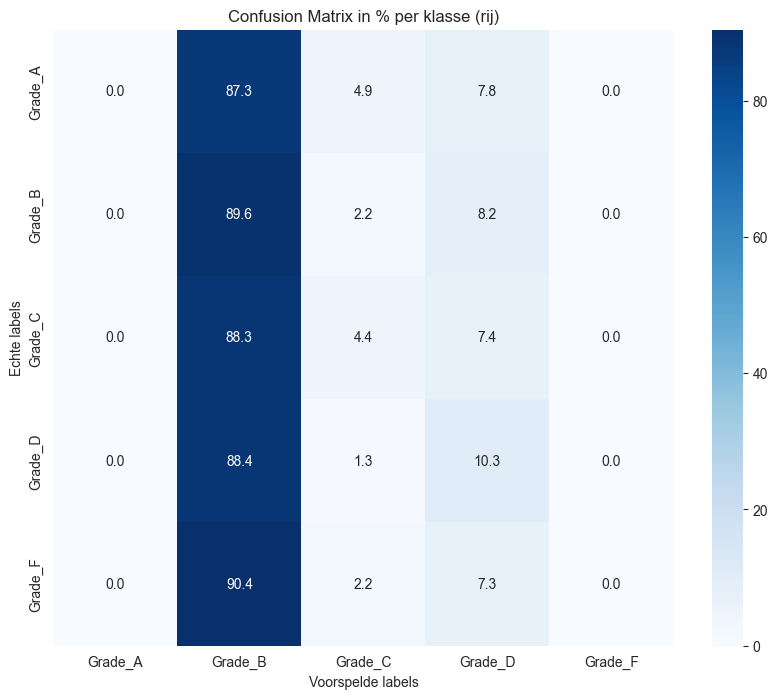

In [151]:
from sklearn.metrics import confusion_matrix

# Stap 1: Maak voorspellingen op de testset
y_pred = model.predict(X_test)

# Stap 2: Converteer van one-hot naar klassenlabels (0 t/m 4)
pred_labels = np.argmax(y_pred, axis=1)
test_labels = np.argmax(y_test, axis=1)

# Stap 3: Genereer confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Stap 4: Zet om naar percentages per rij
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Stap 5: Definieer klassenlabels
class_names = ['Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_F']

# Stap 6: Plotten
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Voorspelde labels")
plt.ylabel("Echte labels")
plt.title("Confusion Matrix in % per klasse (rij)")
plt.show()

In [157]:
from sklearn.ensemble import RandomForestClassifier

# labels = np.argmax(y, axis=1)  # Zet one-hot naar integer labels
# plt.hist(labels, bins=5)
# plt.xticks(ticks=[0,1,2,3,4], labels=['A', 'B', 'C', 'D', 'F'])
# plt.title("Verdeling van klassen in trainingsset")
# plt.xlabel("Grade")
# plt.ylabel("Aantal")
# plt.show()
clf = RandomForestClassifier()
clf.fit(X_train, np.argmax(y_train, axis=1))
y_pred = clf.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.18      0.16      0.17       308
           1       0.18      0.23      0.20       279
           2       0.20      0.20      0.20       298
           3       0.22      0.22      0.22       301
           4       0.21      0.19      0.20       314

    accuracy                           0.20      1500
   macro avg       0.20      0.20      0.20      1500
weighted avg       0.20      0.20      0.20      1500

